In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager,rc
if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font',family=font_name, size=8)
else:
# Mac 인 경우
    rc('font',family='AppleGothic',size=8)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import folium,json
import folium
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import json
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import requests

In [94]:
# pd.read_excel('프로젝트 엑셀 데이터/광주광역시 가구평균 월사용량/가구 평균 월별 전력사용량_2021.01~06.xls')

df_1 = pd.concat([pd.read_excel('프로젝트 엑셀 데이터/광주광역시 가구평균 월사용량(19_20)/가구 평균 월별 전력사용량_2019.01~06.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 가구평균 월사용량(19_20)/가구 평균 월별 전력사용량_2019.07~12.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 가구평균 월사용량(19_20)/가구 평균 월별 전력사용량_2020.01~06.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 가구평균 월사용량(19_20)/가구 평균 월별 전력사용량_2020.07~12.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 가구평균 월사용량/가구 평균 월별 전력사용량_2021.01~06.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 가구평균 월사용량/가구 평균 월별 전력사용량_2021.07~12.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 가구평균 월사용량/가구 평균 월별 전력사용량_2022.01~06.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 가구평균 월사용량/가구 평균 월별 전력사용량_2022.07~12.xls')],
         ignore_index=True)

In [95]:
df_1['대상가구수(호)'].replace(',', '',regex=True, inplace = True)
df_1['대상가구수(호)'] = df_1['대상가구수(호)'].astype('int64')

In [96]:
df_1['전력 사용량(kWh)'] = df_1['대상가구수(호)']*df_1['가구당 평균 전력 사용량(kWh)']

In [97]:
df_1.dtypes

년월                     int64
시도                    object
시군구                   object
대상가구수(호)               int64
가구당 평균 전력 사용량(kWh)     int64
가구당 평균 전기요금(원)        object
전력 사용량(kWh)            int64
dtype: object

In [98]:
df_1['년월'] = df_1['년월'].astype(str)

In [99]:
year = df_1['년월'].apply(lambda x : x[:4])
month = df_1['년월'].apply(lambda x : x[4:])

In [100]:
df_1['년']=year
df_1['월']=month

In [101]:
kwh19_df = df_1.loc[df_1['년']=='2019'][['년', '월','가구당 평균 전력 사용량(kWh)']].groupby('월').mean().reset_index()
kwh20_df = df_1.loc[df_1['년']=='2020'][['년', '월','가구당 평균 전력 사용량(kWh)']].groupby('월').mean().reset_index()
kwh21_df = df_1.loc[df_1['년']=='2021'][['년', '월','가구당 평균 전력 사용량(kWh)']].groupby('월').mean().reset_index()
kwh22_df = df_1.loc[df_1['년']=='2022'][['년', '월','가구당 평균 전력 사용량(kWh)']].groupby('월').mean().reset_index()

In [102]:
kwh21_df,kwh22_df,kwh19_df,kwh20_df
kwh  = []
kwh19_df['가구당 평균 전력 사용량(kWh)'].apply(lambda x : kwh.append(x))
kwh20_df['가구당 평균 전력 사용량(kWh)'].apply(lambda x : kwh.append(x))
kwh

[237.8,
 235.8,
 206.4,
 217.0,
 203.2,
 205.2,
 215.2,
 289.4,
 259.2,
 210.6,
 211.0,
 220.8,
 238.0,
 239.8,
 224.2,
 226.6,
 213.2,
 219.0,
 226.8,
 278.2,
 301.6,
 213.2,
 219.2,
 230.4]

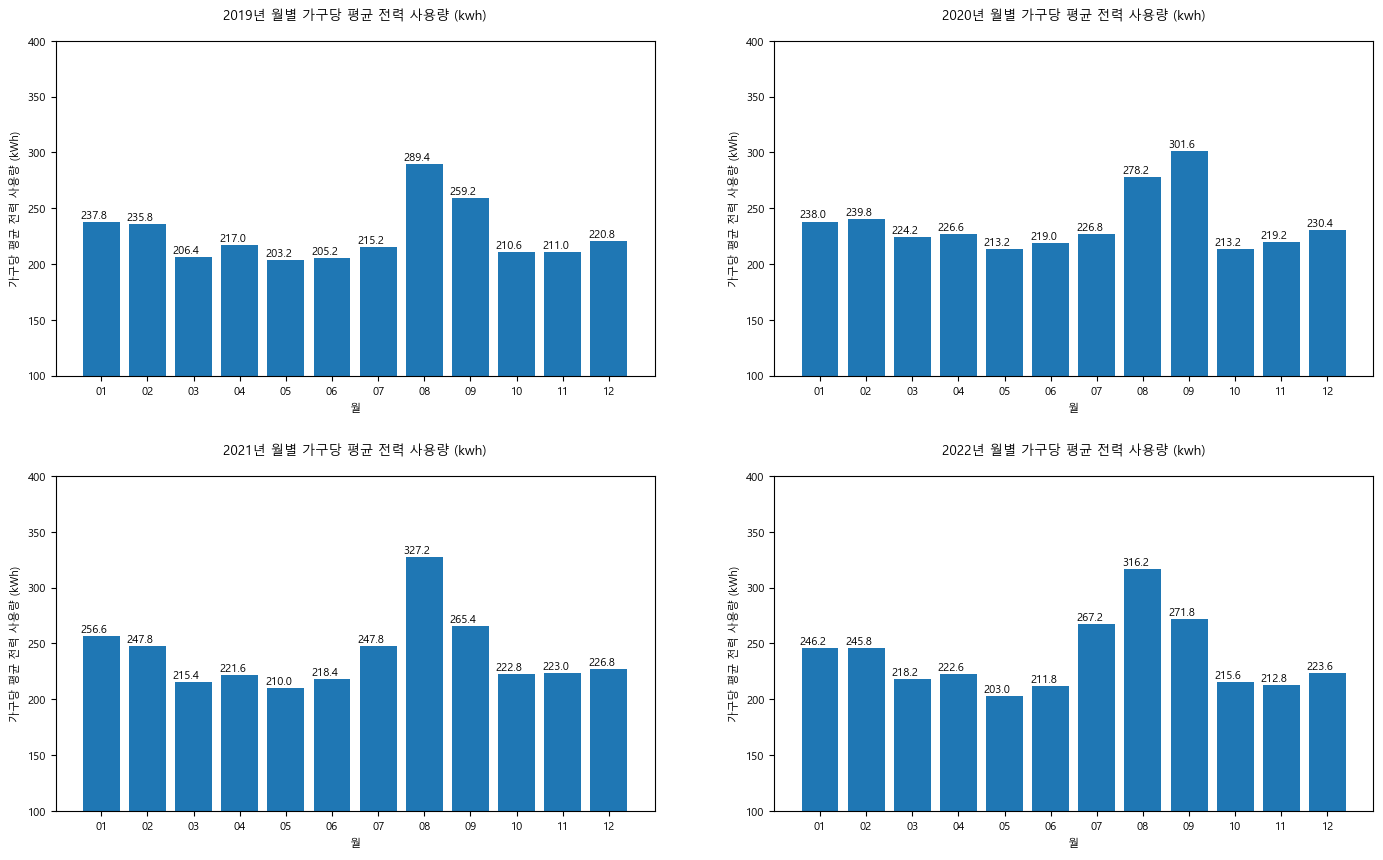

In [103]:
plt.figure(figsize=(17,10))
plt.subplots_adjust(hspace=0.3)
plt.subplot(2,2,1)
plt.bar(kwh19_df['월'],kwh19_df['가구당 평균 전력 사용량(kWh)'])
plt.title('2019년 월별 가구당 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('가구당 평균 전력 사용량 (kWh)')
plt.ylim([100,400])
for i, v in enumerate(kwh19_df['가구당 평균 전력 사용량(kWh)']):
    plt.text(i-0.45, v + 3, v)

plt.subplot(2,2,2)
plt.bar(kwh20_df['월'],kwh20_df['가구당 평균 전력 사용량(kWh)'])
plt.title('2020년 월별 가구당 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('가구당 평균 전력 사용량 (kWh)')
plt.ylim([100,400])
for i, v in enumerate(kwh20_df['가구당 평균 전력 사용량(kWh)']):
    plt.text(i-0.45, v + 3, v)

plt.subplot(2,2,3)
plt.bar(kwh21_df['월'],kwh21_df['가구당 평균 전력 사용량(kWh)'])
plt.title('2021년 월별 가구당 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylim([100,400])
plt.ylabel('가구당 평균 전력 사용량 (kWh)')
for i, v in enumerate(kwh21_df['가구당 평균 전력 사용량(kWh)']):
    plt.text(i-0.45, v + 3, v)

plt.subplot(2,2,4)
plt.bar(kwh22_df['월'],kwh22_df['가구당 평균 전력 사용량(kWh)'])
plt.title('2022년 월별 가구당 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('가구당 평균 전력 사용량 (kWh)')
plt.ylim([100 ,400])
for i, v in enumerate(kwh22_df['가구당 평균 전력 사용량(kWh)']):
    plt.text(i-0.45, v + 3, v)
plt.show()

In [104]:
df_2 = pd.concat([pd.read_excel('프로젝트 엑셀 데이터/광주광역시 용도별 월사용량(19_20)/계약종별 전력사용량 월별_2019.01~06.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 용도별 월사용량(19_20)/계약종별 전력사용량 월별_2019.07~12.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 용도별 월사용량(19_20)/계약종별 전력사용량 월별_2020.01~06.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 용도별 월사용량(19_20)/계약종별 전력사용량 월별_2020.07~12.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 용도별 월사용량/계약종별 전력사용량 월별_2021.01~06.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 용도별 월사용량/계약종별 전력사용량 월별_2021.07~12.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 용도별 월사용량/계약종별 전력사용량 월별_2022.01~06.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 용도별 월사용량/계약종별 전력사용량 월별_2022.07~12.xls')],
         ignore_index=True)

In [105]:
df_2

,년월,시구,시군구,계약구분,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh)
0,201901,광주광역시,광산구,가로등,"11,891","2,660,449","288,886,605",108.6
1,201901,광주광역시,광산구,교육용,164,"6,741,847","699,917,616",103.8
2,201901,광주광역시,광산구,농사용,"5,739","6,108,046","284,320,122",46.5
3,201901,광주광역시,광산구,산업용,"3,083","176,730,544","22,196,237,782",125.6
4,201901,광주광역시,광산구,심 야,"1,463","3,610,824","263,009,079",72.8
...,...,...,...,...,...,...,...,...
1915,202212,광주광역시,서구,산업용,684,"26,773,505","4,076,579,360",152.3
1916,202212,광주광역시,서구,심 야,699,"1,273,849","122,462,022",96.1
1917,202212,광주광역시,서구,일반용,"20,502","63,473,543","10,215,853,633",160.9
1918,202212,광주광역시,서구,주택용,"76,911","35,741,374","4,461,869,338",124.8


In [106]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   년월             1920 non-null   int64  
 1   시구             1920 non-null   object 
 2   시군구            1920 non-null   object 
 3   계약구분           1920 non-null   object 
 4   고객호수(호)        1920 non-null   object 
 5   사용량(kWh)       1920 non-null   object 
 6   전기요금(원)        1920 non-null   object 
 7   평균판매단가(원/kWh)  1920 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 120.1+ KB


In [107]:
df_2['고객호수(호)'].replace(',', '',regex=True, inplace = True)
df_2['고객호수(호)'] = df_2['고객호수(호)'].astype('int64')
df_2['사용량(kWh)'].replace(',', '',regex=True, inplace = True)
df_2['사용량(kWh)'] = df_2['사용량(kWh)'].astype('int64')

In [108]:
df_2['고객당 평균 전력 사용량(kWh)'] = np.round(df_2['사용량(kWh)']/df_2['고객호수(호)'],1)

In [109]:
df_2

,년월,시구,시군구,계약구분,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh),고객당 평균 전력 사용량(kWh)
0,201901,광주광역시,광산구,가로등,11891,2660449,"288,886,605",108.6,223.7
1,201901,광주광역시,광산구,교육용,164,6741847,"699,917,616",103.8,41108.8
2,201901,광주광역시,광산구,농사용,5739,6108046,"284,320,122",46.5,1064.3
3,201901,광주광역시,광산구,산업용,3083,176730544,"22,196,237,782",125.6,57324.2
4,201901,광주광역시,광산구,심 야,1463,3610824,"263,009,079",72.8,2468.1
...,...,...,...,...,...,...,...,...,...
1915,202212,광주광역시,서구,산업용,684,26773505,"4,076,579,360",152.3,39142.6
1916,202212,광주광역시,서구,심 야,699,1273849,"122,462,022",96.1,1822.4
1917,202212,광주광역시,서구,일반용,20502,63473543,"10,215,853,633",160.9,3096.0
1918,202212,광주광역시,서구,주택용,76911,35741374,"4,461,869,338",124.8,464.7


In [110]:
df_2['년월'] = df_2['년월'].astype(str)

In [111]:
year = df_2['년월'].apply(lambda x : x[:4])
month = df_2['년월'].apply(lambda x : x[4:])

In [112]:
df_2['년']=year
df_2['월']=month

In [113]:
kwh19_df2 = df_2.loc[df_2['년']=='2019'][['년','월','계약구분','고객당 평균 전력 사용량(kWh)']].pivot_table(index=['월'], columns='계약구분', values = '고객당 평균 전력 사용량(kWh)')
kwh19_df2 = kwh19_df2[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]
kwh20_df2 = df_2.loc[df_2['년']=='2020'][['년','월','계약구분','고객당 평균 전력 사용량(kWh)']].pivot_table(index=['월'], columns='계약구분', values = '고객당 평균 전력 사용량(kWh)')
kwh20_df2 = kwh20_df2[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]
kwh21_df2 = df_2.loc[df_2['년']=='2021'][['년','월','계약구분','고객당 평균 전력 사용량(kWh)']].pivot_table(index=['월'], columns='계약구분', values = '고객당 평균 전력 사용량(kWh)')
kwh21_df2 = kwh21_df2[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]
kwh22_df2 = df_2.loc[df_2['년']=='2022'][['년','월','계약구분','고객당 평균 전력 사용량(kWh)']].pivot_table(index=['월'], columns='계약구분', values = '고객당 평균 전력 사용량(kWh)')
kwh22_df2 = kwh22_df2[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]

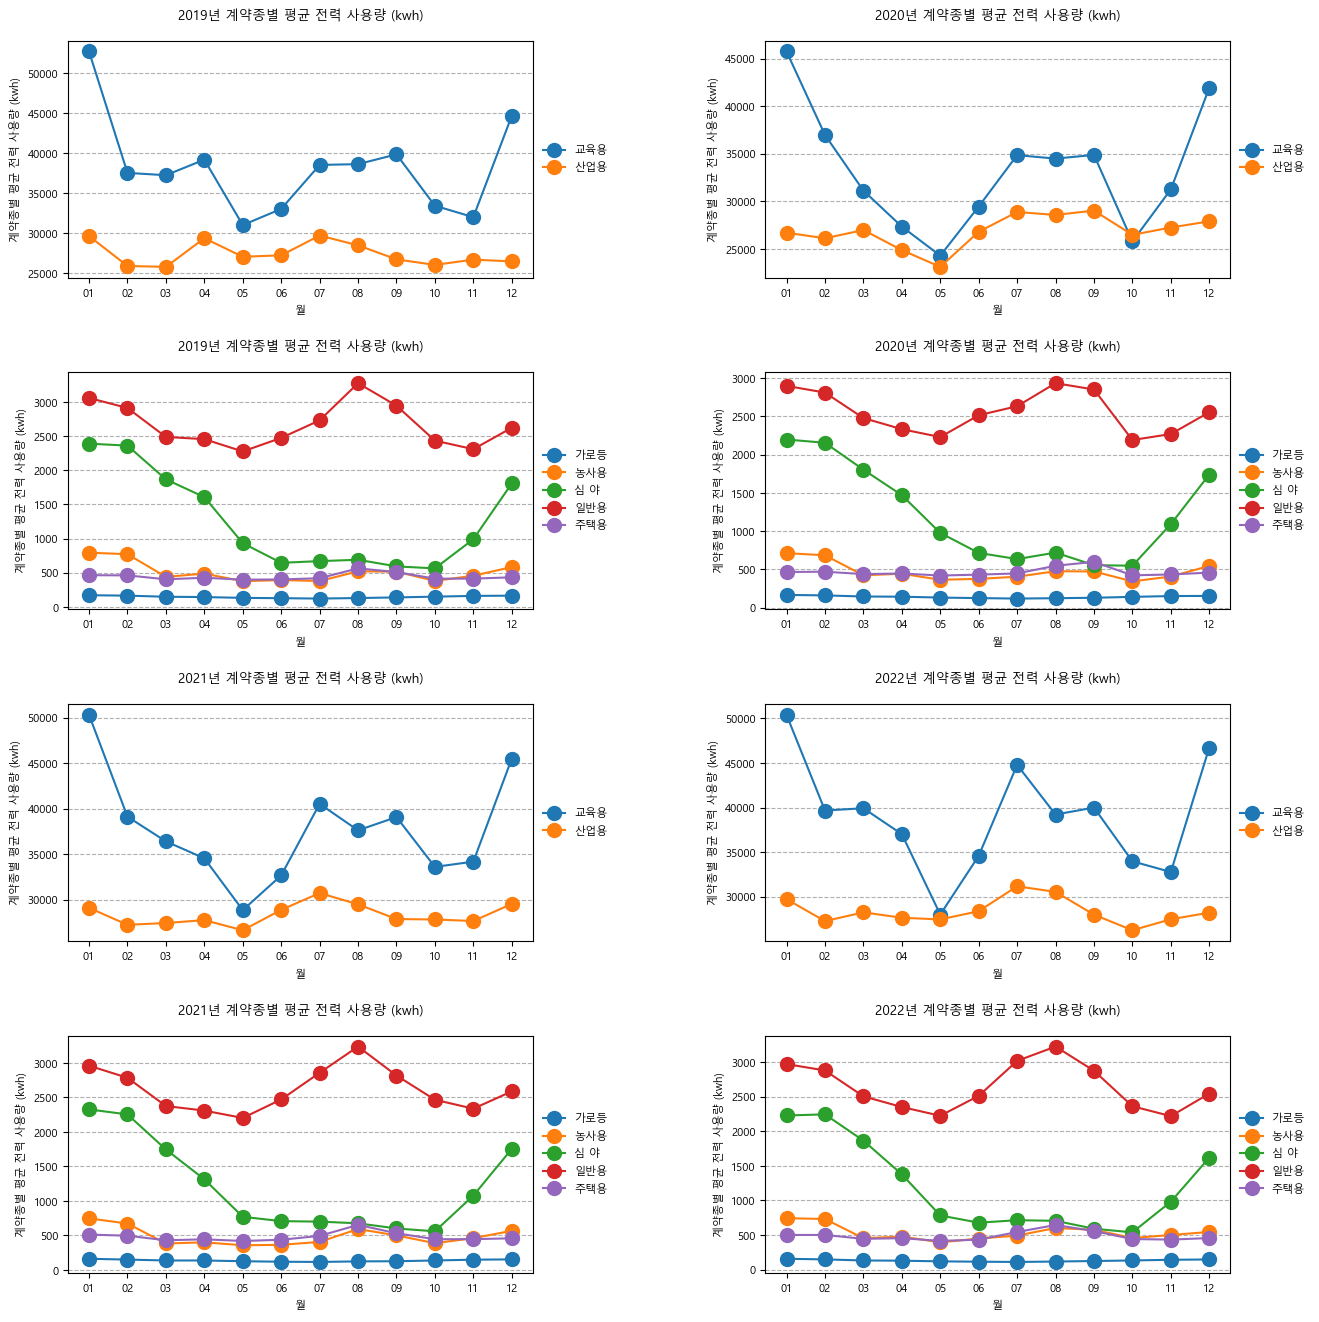

In [114]:
plt.figure(figsize=(15,16))

plt.subplot(4,2,1)
plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.plot(kwh19_df2[['교육용','산업용']], marker = 'o', markersize=10)
plt.title('2019년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh19_df2[['교육용','산업용']].columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.grid(axis='y', linestyle='--', alpha=1)

plt.subplot(4,2,2)
plt.plot(kwh20_df2[['교육용','산업용']], marker = 'o', markersize=10)
plt.title('2020년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh20_df2[['교육용','산업용']].columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.grid(axis='y', linestyle='--', alpha=1)

plt.subplot(4,2,3)
plt.subplots_adjust(wspace=0.5)
plt.plot(kwh19_df2[['가로등', '농사용', '심 야', '일반용', '주택용']], marker = 'o', markersize=10)
plt.title('2019년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh19_df2[['가로등', '농사용', '심 야', '일반용', '주택용']].columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.grid(axis='y', linestyle='--', alpha=1)

plt.subplot(4,2,4)
plt.subplots_adjust(wspace=0.5)
plt.plot(kwh20_df2[['가로등', '농사용', '심 야', '일반용', '주택용']], marker = 'o', markersize=10)
plt.title('2020년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh20_df2[['가로등', '농사용', '심 야', '일반용', '주택용']].columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.grid(axis='y', linestyle='--', alpha=1)

plt.subplot(4,2,5)
plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.plot(kwh21_df2[['교육용','산업용']], marker = 'o', markersize=10)
plt.title('2021년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh21_df2[['교육용','산업용']].columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.grid(axis='y', linestyle='--', alpha=1)

plt.subplot(4,2,6)
plt.plot(kwh22_df2[['교육용','산업용']], marker = 'o', markersize=10)
plt.title('2022년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh22_df2[['교육용','산업용']].columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.grid(axis='y', linestyle='--', alpha=1)

plt.subplot(4,2,7)
plt.subplots_adjust(wspace=0.5)
plt.plot(kwh21_df2[['가로등', '농사용', '심 야', '일반용', '주택용']], marker = 'o', markersize=10)
plt.title('2021년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh21_df2[['가로등', '농사용', '심 야', '일반용', '주택용']].columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.grid(axis='y', linestyle='--', alpha=1)

plt.subplot(4,2,8)
plt.subplots_adjust(wspace=0.5)
plt.plot(kwh22_df2[['가로등', '농사용', '심 야', '일반용', '주택용']], marker = 'o', markersize=10)
plt.title('2022년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh22_df2[['가로등', '농사용', '심 야', '일반용', '주택용']].columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.grid(axis='y', linestyle='--', alpha=1)

plt.show()

In [115]:
df_2

,년월,시구,시군구,계약구분,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh),고객당 평균 전력 사용량(kWh),년,월
0,201901,광주광역시,광산구,가로등,11891,2660449,"288,886,605",108.6,223.7,2019,01
1,201901,광주광역시,광산구,교육용,164,6741847,"699,917,616",103.8,41108.8,2019,01
2,201901,광주광역시,광산구,농사용,5739,6108046,"284,320,122",46.5,1064.3,2019,01
3,201901,광주광역시,광산구,산업용,3083,176730544,"22,196,237,782",125.6,57324.2,2019,01
4,201901,광주광역시,광산구,심 야,1463,3610824,"263,009,079",72.8,2468.1,2019,01
...,...,...,...,...,...,...,...,...,...,...,...
1915,202212,광주광역시,서구,산업용,684,26773505,"4,076,579,360",152.3,39142.6,2022,12
1916,202212,광주광역시,서구,심 야,699,1273849,"122,462,022",96.1,1822.4,2022,12
1917,202212,광주광역시,서구,일반용,20502,63473543,"10,215,853,633",160.9,3096.0,2022,12
1918,202212,광주광역시,서구,주택용,76911,35741374,"4,461,869,338",124.8,464.7,2022,12


In [116]:
sumkwh19_df2 = df_2.loc[df_2['년']=='2019'][['계약구분','사용량(kWh)']].groupby('계약구분').sum()
sumkwh19_df2 = sumkwh19_df2.loc[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]

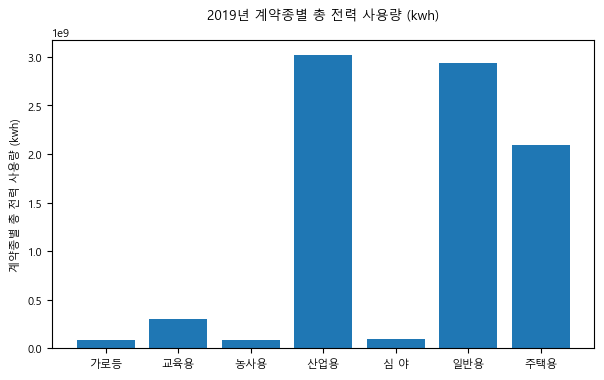

In [117]:
plt.figure(figsize=(7,4))
plt.bar(sumkwh19_df2.index, height=sumkwh19_df2['사용량(kWh)'])
plt.title('2019년 계약종별 총 전력 사용량 (kwh)',pad = 15)
plt.ylabel('계약종별 총 전력 사용량 (kwh)')
plt.show()

In [118]:
sumplot_19 = df_2.loc[df_2['년']=='2019'][['계약구분','사용량(kWh)','월']].pivot_table(index=['월'], columns='계약구분', values = '사용량(kWh)',aggfunc='sum')
sumplot_19 = sumplot_19[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]
sumplot_20 = df_2.loc[df_2['년']=='2020'][['계약구분','사용량(kWh)','월']].pivot_table(index=['월'], columns='계약구분', values = '사용량(kWh)',aggfunc='sum')
sumplot_20 = sumplot_20[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]
sumplot_21 = df_2.loc[df_2['년']=='2021'][['계약구분','사용량(kWh)','월']].pivot_table(index=['월'], columns='계약구분', values = '사용량(kWh)',aggfunc='sum')
sumplot_21 = sumplot_21[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]
sumplot_22 = df_2.loc[df_2['년']=='2022'][['계약구분','사용량(kWh)','월']].pivot_table(index=['월'], columns='계약구분', values = '사용량(kWh)',aggfunc='sum')
sumplot_22 = sumplot_22[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]

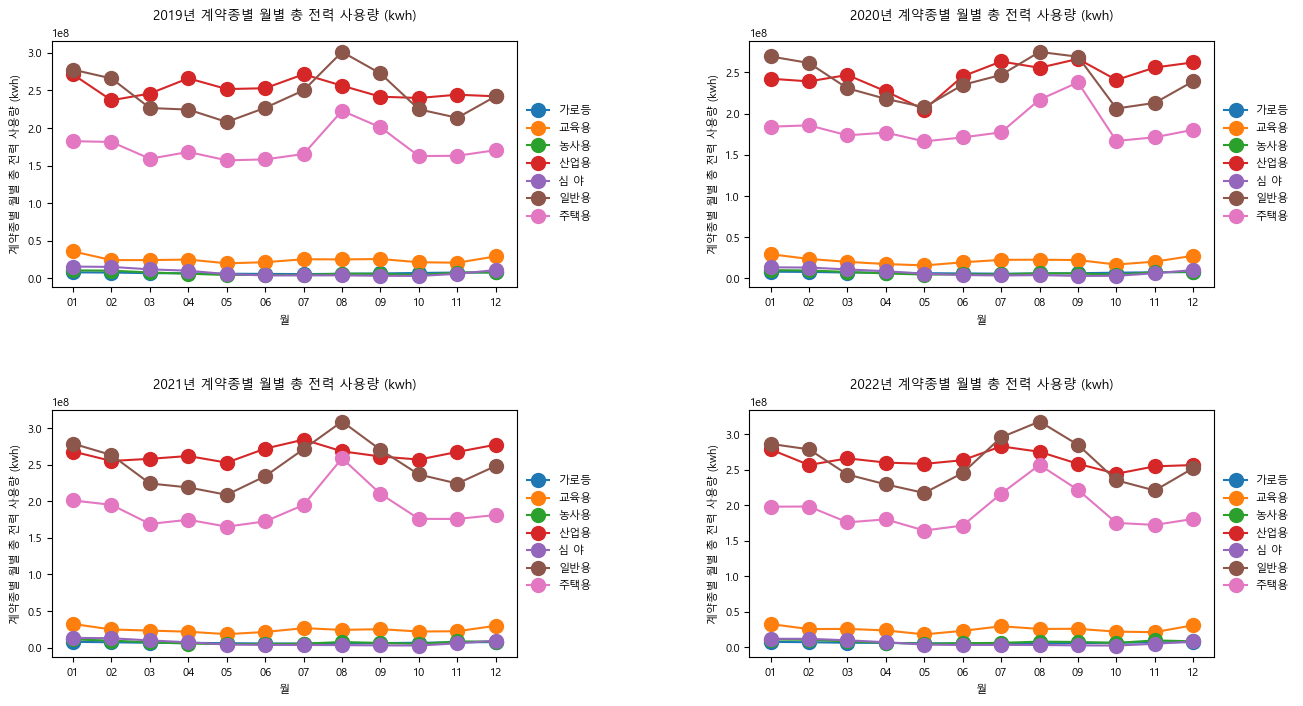

In [119]:
plt.figure(figsize=(15,8))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.subplot(2,2,1)
plt.plot(sumplot_19, marker = 'o', markersize=10)
plt.legend(sumplot_19.columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.title('2019년 계약종별 월별 총 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 월별 총 전력 사용량 (kwh)')

plt.subplot(2,2,2)
plt.plot(sumplot_20, marker = 'o', markersize=10)
plt.legend(sumplot_20.columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.title('2020년 계약종별 월별 총 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 월별 총 전력 사용량 (kwh)')

plt.subplot(2,2,3)
plt.plot(sumplot_21, marker = 'o', markersize=10)
plt.legend(sumplot_21.columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.title('2021년 계약종별 월별 총 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 월별 총 전력 사용량 (kwh)')

plt.subplot(2,2,4)
plt.plot(sumplot_22, marker = 'o', markersize=10)
plt.legend(sumplot_22.columns,loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.title('2022년 계약종별 월별 총 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 월별 총 전력 사용량 (kwh)')

plt.show()

In [120]:
sun_df = pd.read_csv('프로젝트 엑셀 데이터/한국전력거래소_지역별 시간별 태양광 발전량_20211231.csv',encoding='cp949')

In [121]:
sun_df=sun_df.loc[sun_df['지역']=='광주시']

In [122]:
year = sun_df['거래일자'].apply(lambda x : x[:4])
month = sun_df['거래일자'].apply(lambda x : x[5:7])
day = sun_df['거래일자'].apply(lambda x : x[8:])

In [123]:
sun_df['년'] = year
sun_df['월'] = month
sun_df['일'] = day

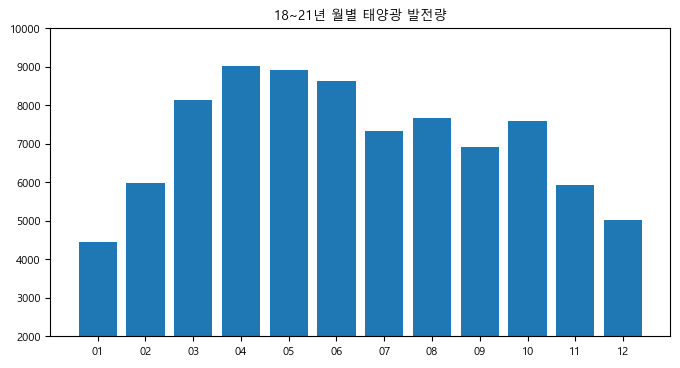

In [124]:
plt.figure(figsize=(8,4))
plt.title('18~21년 월별 태양광 발전량')
plt.bar(sun_df.groupby('월').mean().index, sun_df.groupby('월').mean()['발전량 '])
plt.ylim([2000,10000])
plt.show()

In [125]:
data = pd.read_csv('프로젝트 엑셀 데이터/한국전력공사_법정동별_상계거래_사용전력량_20191231.csv',encoding='cp949')

In [126]:
data

,시도,시군구,법정동,년도,월,전체호수,전력사용량
0,강원도,강릉시,강동면,2019,1,132,76515
1,강원도,강릉시,강동면,2019,2,132,73701
2,강원도,강릉시,강동면,2019,3,133,55273
3,강원도,강릉시,강동면,2019,4,135,63590
4,강원도,강릉시,강동면,2019,5,137,64840
...,...,...,...,...,...,...,...
56100,충청북도,충주시,호암동,2019,8,62,45873
56101,충청북도,충주시,호암동,2019,9,63,37877
56102,충청북도,충주시,호암동,2019,10,64,33963
56103,충청북도,충주시,호암동,2019,11,64,31364


In [127]:
gwangju.dropna(inplace=True)
gwangju.reset_index(inplace=True,drop=True)
gwangju.head()

,시도,시군구,법정동,년도,월,전체호수,전력사용량
0,광주광역시,광산구,고룡동,2019,1,0,0
1,광주광역시,광산구,고룡동,2019,2,0,0
2,광주광역시,광산구,고룡동,2019,3,0,0
3,광주광역시,광산구,고룡동,2019,4,0,0
4,광주광역시,광산구,고룡동,2019,5,0,0


In [128]:
gwangju = data[data['시도'] == '광주광역시']
gwangju_rhkdtksrn = gwangju[gwangju['시군구'] == '광산구']
gwangju_qnrrn = gwangju[gwangju['시군구'] == '북구']
gwangju_skarn = gwangju[gwangju['시군구'] == '남구']
gwangju_ehdrn = gwangju[gwangju['시군구'] == '동구']
gwangju_tjrn = gwangju[gwangju['시군구'] == '서구']

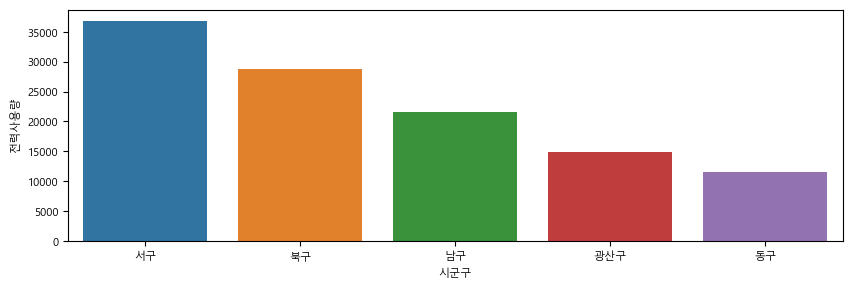

In [129]:
gwangju_g = gwangju.groupby('시군구')['전력사용량'].mean().sort_values(ascending=False)
gwangju_g = gwangju_g.reset_index()
plt.figure(figsize=(10,3))
sns.barplot(data=gwangju_g,x= '시군구', y='전력사용량')
plt.show()

In [130]:
gwangju_gs = gwangju_rhkdtksrn.groupby('법정동')['전력사용량'].mean().sort_values(ascending=False)
gwangju_gs = gwangju_rhkdtksrn.reset_index()
gwangju_bk = gwangju_qnrrn.groupby('법정동')['전력사용량'].mean().sort_values(ascending=False)
gwangju_bk = gwangju_qnrrn.reset_index()
gwangju_sk = gwangju_tjrn.groupby('법정동')['전력사용량'].mean().sort_values(ascending=False)
gwangju_sk = gwangju_tjrn.reset_index()
gwangju_nk = gwangju_skarn.groupby('법정동')['전력사용량'].mean().sort_values(ascending=False)
gwangju_nk = gwangju_skarn.reset_index()
gwangju_dk = gwangju_ehdrn.groupby('법정동')['전력사용량'].mean().sort_values(ascending=False)
gwangju_dk = gwangju_ehdrn.reset_index()

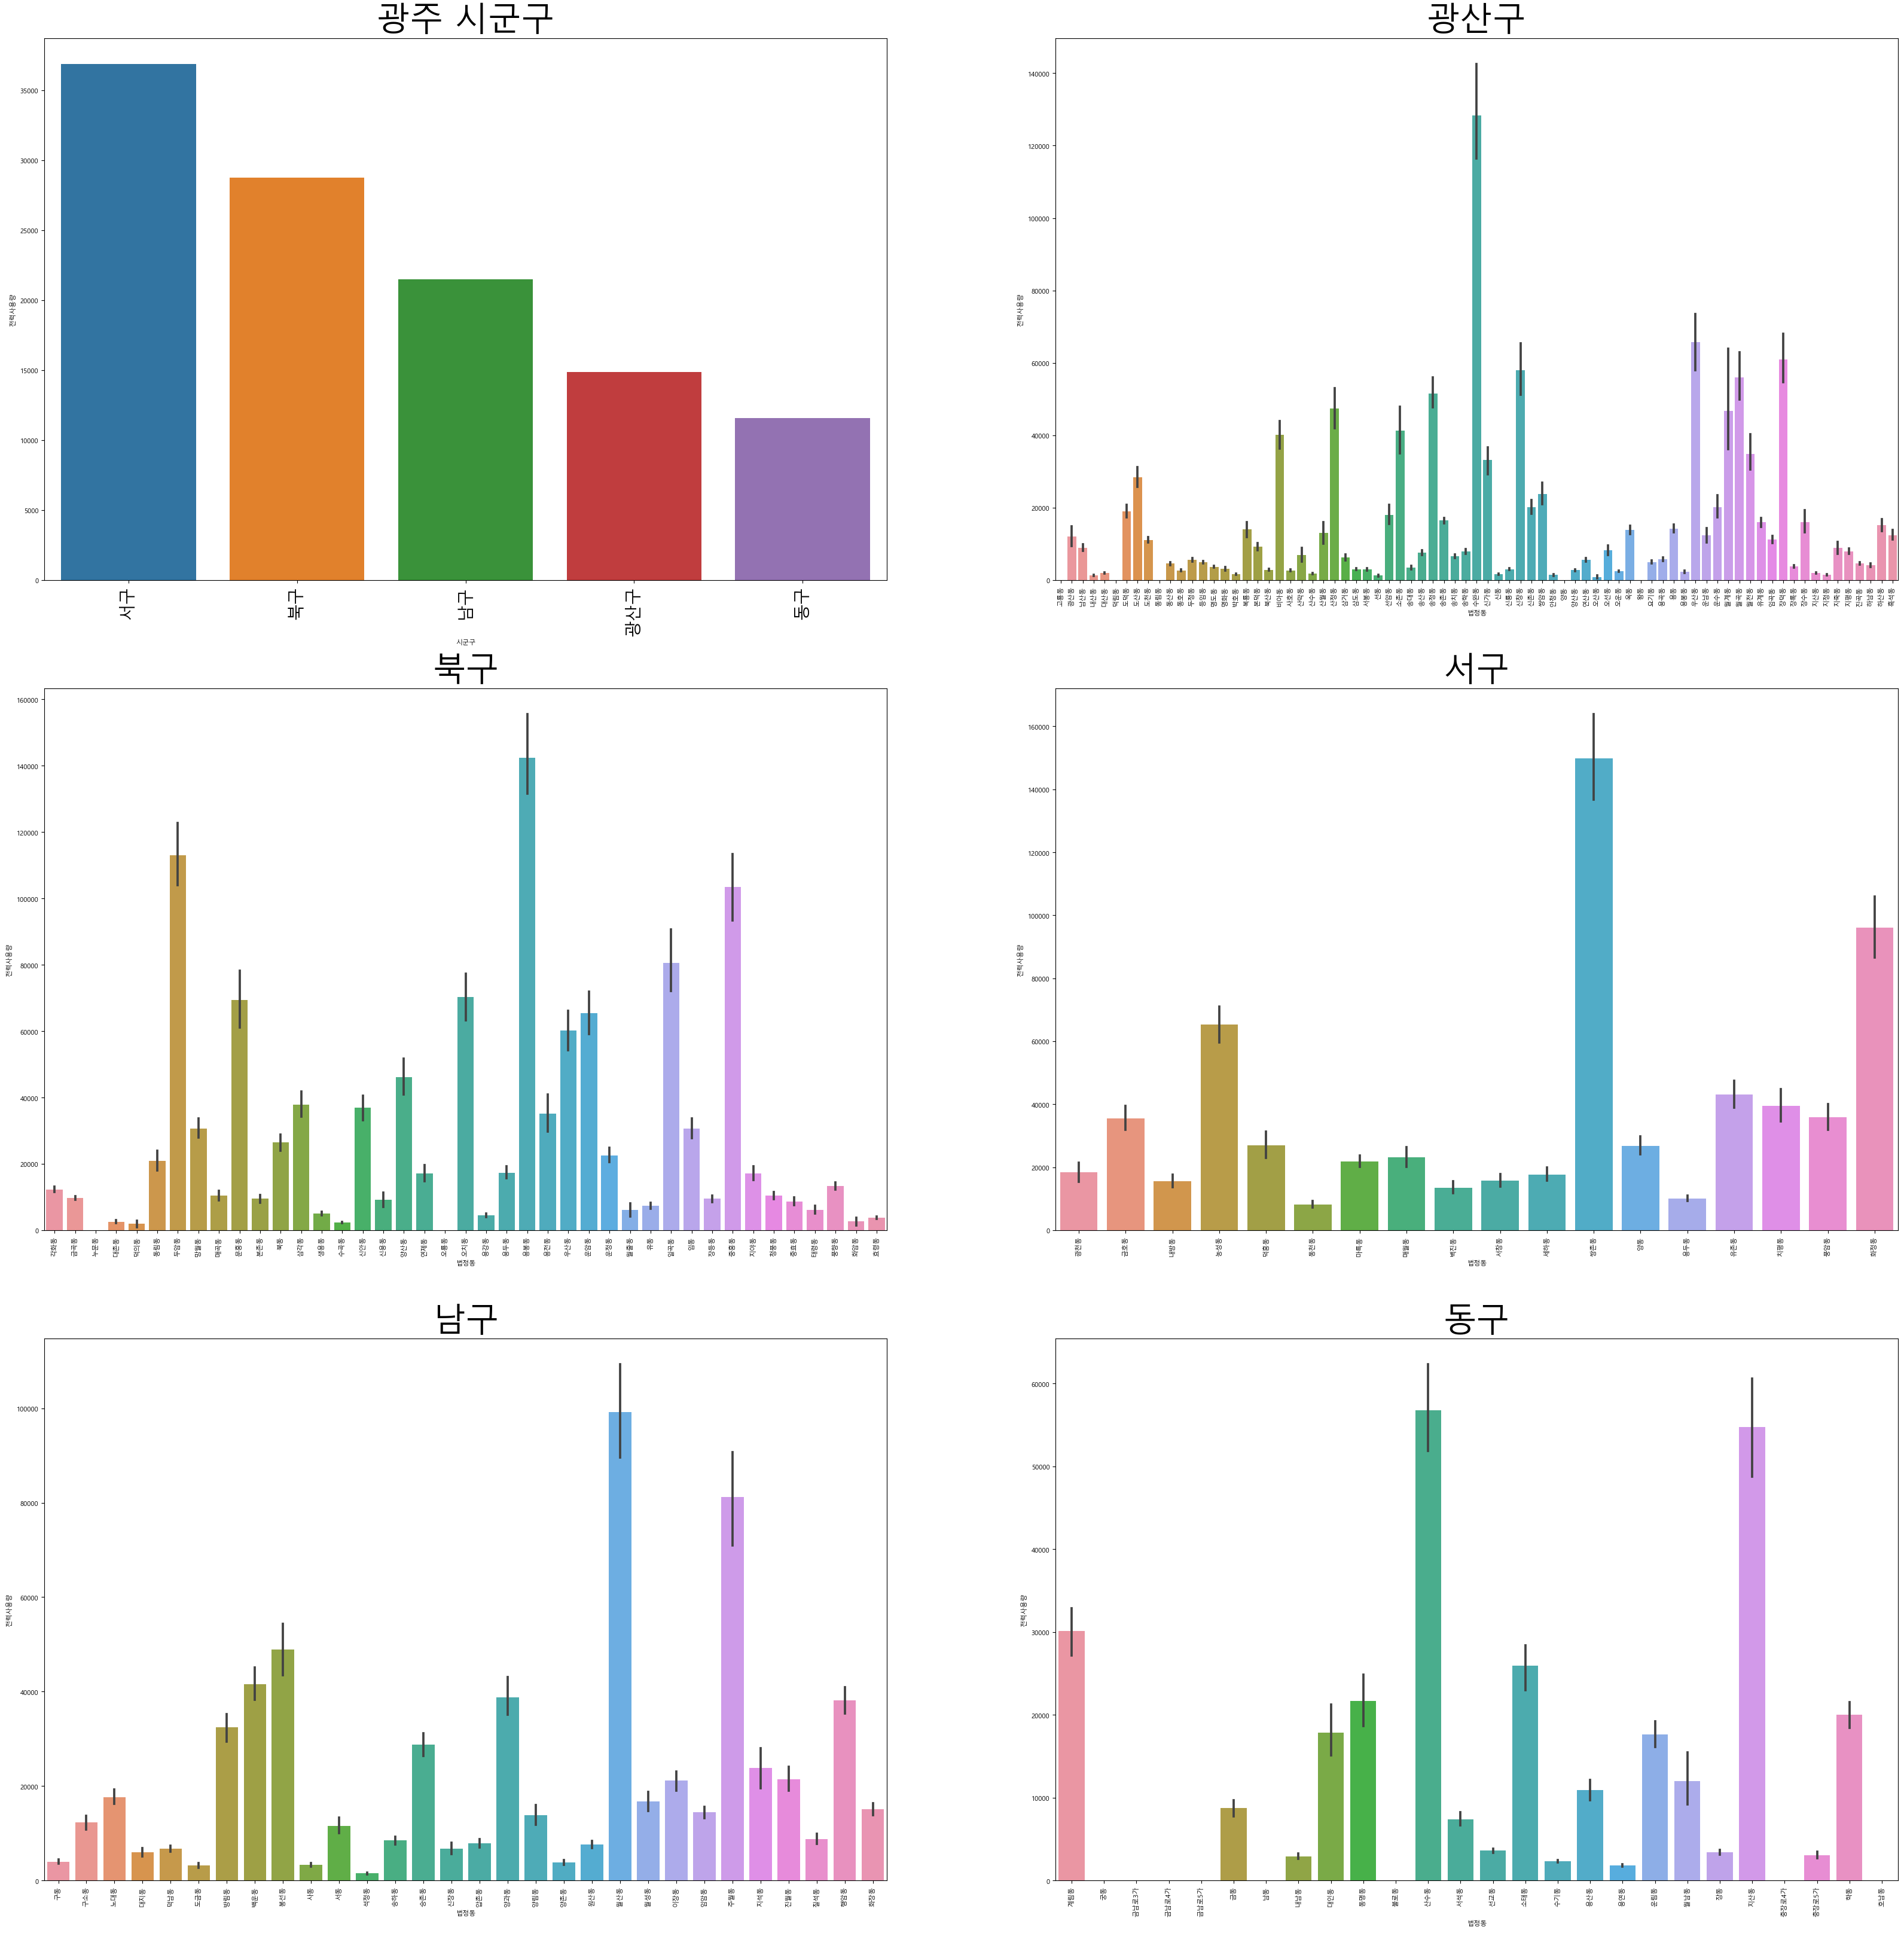

In [131]:
plt.figure(figsize=(40,40)) # 그래프 크기 조정
plt.subplot(3,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프
g = sns.barplot(x="시군구", y="전력사용량", data=gwangju_g)
g.set_title('광주 시군구',size=40)
g.set_xticklabels(g.get_xticklabels(),rotation=90,size=20)


plt.subplot(3,2,2) # 1행 2열의 첫 번째(1행, 1열) 그래프
g = sns.barplot(x="법정동", y="전력사용량", data=gwangju_gs)
g.set_title('광산구',size=40)
g.set_xticklabels(g.get_xticklabels(),rotation=90)


plt.subplot(3,2,3) # 1행 2열의 첫 번째(1행, 1열) 그래프
g = sns.barplot(x="법정동", y="전력사용량", data=gwangju_bk)
g.set_title('북구',size=40)
g.set_xticklabels(g.get_xticklabels(),rotation=90)


plt.subplot(3,2,4) # 1행 2열의 첫 번째(1행, 1열) 그래프
g = sns.barplot(x="법정동", y="전력사용량", data=gwangju_sk)
g.set_title('서구',size=40)
g.set_xticklabels(g.get_xticklabels(),rotation=90)


plt.subplot(3,2,5) # 1행 2열의 첫 번째(1행, 1열) 그래프
g = sns.barplot(x="법정동", y="전력사용량", data=gwangju_nk)
g.set_title('남구',size=40)
g.set_xticklabels(g.get_xticklabels(),rotation=90)


plt.subplot(3,2,6) # 1행 2열의 첫 번째(1행, 1열) 그래프
g = sns.barplot(x="법정동", y="전력사용량", data=gwangju_dk)
g.set_title('동구',size=40)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

In [132]:
data = pd.read_csv('프로젝트 엑셀 데이터/한국전력공사_법정동별_상계거래_사용전력량_20191231.csv',encoding='cp949')

In [133]:
gwangju = data[data['시도'] == '광주광역시']
gwangju_rhkdtksrn = gwangju[gwangju['시군구'] == '광산구']
gwangju_qnrrn = gwangju[gwangju['시군구'] == '북구']
gwangju_skarn = gwangju[gwangju['시군구'] == '남구']
gwangju_ehdrn = gwangju[gwangju['시군구'] == '동구']
gwangju_tjrn = gwangju[gwangju['시군구'] == '서구']
gwangju_a = gwangju.groupby('시군구')['전력사용량'].mean().sort_values(ascending=False)

In [134]:
geo_path = 'hangjeongdong_광주광역시.geojson'
geo_str = json.load(open(geo_path, encoding='utf-8'))
geo_str

{'type': 'FeatureCollection',
 'name': 'temp',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 913,
    'adm_nm': '광주광역시 동구 충장동',
    'adm_cd': '2401051',
    'adm_cd2': '2911052500',
    'sgg': '29110',
    'sido': '29',
    'sidonm': '광주광역시',
    'sggnm': '동구'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[126.91920507407151, 35.15325407909361],
       [126.91917063299555, 35.153225637406486],
       [126.91971301742304, 35.15281850488077],
       [126.92115623098215, 35.15175773638071],
       [126.92216781183716, 35.15119298876562],
       [126.92392414654104, 35.149780566865914],
       [126.92504723757074, 35.14884789846158],
       [126.92507819645617, 35.14882218712237],
       [126.9249284087379, 35.14867927537984],
       [126.92433928111625, 35.14811725029431],
       [126.92223184607597, 35.148363067205885],
       [126.92163654563642, 35.14825873197957],
 

In [135]:
gwangju.dropna(inplace=True)
gwangju.reset_index(inplace=True,drop=True)
gwangju.head()

,시도,시군구,법정동,년도,월,전체호수,전력사용량
0,광주광역시,광산구,고룡동,2019,1,0,0
1,광주광역시,광산구,고룡동,2019,2,0,0
2,광주광역시,광산구,고룡동,2019,3,0,0
3,광주광역시,광산구,고룡동,2019,4,0,0
4,광주광역시,광산구,고룡동,2019,5,0,0


In [136]:
gwangju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      2304 non-null   object
 1   시군구     2304 non-null   object
 2   법정동     2304 non-null   object
 3   년도      2304 non-null   int64 
 4   월       2304 non-null   int64 
 5   전체호수    2304 non-null   int64 
 6   전력사용량   2304 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 126.1+ KB


In [137]:
geo_data = open('hangjeongdong_광주광역시.geojson','r',encoding='utf8')
geo_data = json.load(geo_data)
geo_data

{'type': 'FeatureCollection',
 'name': 'temp',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 913,
    'adm_nm': '광주광역시 동구 충장동',
    'adm_cd': '2401051',
    'adm_cd2': '2911052500',
    'sgg': '29110',
    'sido': '29',
    'sidonm': '광주광역시',
    'sggnm': '동구'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[126.91920507407151, 35.15325407909361],
       [126.91917063299555, 35.153225637406486],
       [126.91971301742304, 35.15281850488077],
       [126.92115623098215, 35.15175773638071],
       [126.92216781183716, 35.15119298876562],
       [126.92392414654104, 35.149780566865914],
       [126.92504723757074, 35.14884789846158],
       [126.92507819645617, 35.14882218712237],
       [126.9249284087379, 35.14867927537984],
       [126.92433928111625, 35.14811725029431],
       [126.92223184607597, 35.148363067205885],
       [126.92163654563642, 35.14825873197957],
 

In [138]:
map = folium.Map((35.1557,126.8354),zoom_start=8)
jsonfile = open('hangjeongdong_광주광역시.geojson','r',encoding='utf8')
jsondata = json.load(jsonfile)
jsondata_gwangju = {'type':'FeatureCollection'}
jsondata_pick = []
jsondata_dong = []
for idx in jsondata['features']:
    if idx ['properties']['sidonm'] == "광주광역시":
        dong = idx['properties']['sggnm']
        jsondata_dong.append(dong)
        idx['id'] = dong
        jsondata_pick.append(idx)
jsondata_gwangju['features'] =jsondata_pick

In [139]:
map = folium.Map((35.1557,126.8354),zoom_start=10)
folium.Choropleth(geo_data=jsondata_gwangju,
                 data=gwangju_a,
                  columns=['법정동','전력사용량'],
                  key_on='feature.id',
                 legend_name='광주 전력사용량 ',
                 bins=10,fill_color='PuRd').add_to(map)
map